# Weather History dataset of one particular place

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
from scipy.stats import linregress
from scipy.optimize import curve_fit
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

importing dataset

In [3]:
df=pd.read_csv('weatherHistory.csv')

In [4]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [5]:
# data cleaning

In [6]:
del df['Apparent Temperature (C)']

In [7]:
del df['Visibility (km)']

In [8]:
del df['Loud Cover']

In [9]:
del df['Daily Summary']

In [10]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,1016.51
...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,1014.36
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,1015.16
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,1015.66
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,1015.95


In [11]:
# statistics

In [12]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,1015.13
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,1015.63
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,1015.94
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,1016.41
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,1016.51


In [13]:
df.tail()

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,1014.36
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,1015.16
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,1015.66
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,1015.95
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,0.61,5.8765,39.0,1016.16


In [14]:
df.shape

(96453, 8)

In [15]:
df[['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']].max()

Temperature (C)             39.905556
Humidity                     1.000000
Wind Speed (km/h)           63.852600
Wind Bearing (degrees)     359.000000
Pressure (millibars)      1046.380000
dtype: float64

In [16]:
df[['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']].min()

Temperature (C)          -21.822222
Humidity                   0.000000
Wind Speed (km/h)          0.000000
Wind Bearing (degrees)     0.000000
Pressure (millibars)       0.000000
dtype: float64

In [17]:
df[['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']].median()

Temperature (C)             12.0000
Humidity                     0.7800
Wind Speed (km/h)            9.9659
Wind Bearing (degrees)     180.0000
Pressure (millibars)      1016.4500
dtype: float64

In [18]:
df[['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']].mean()

Temperature (C)             11.932678
Humidity                     0.734899
Wind Speed (km/h)           10.810640
Wind Bearing (degrees)     187.509232
Pressure (millibars)      1003.235956
dtype: float64

In [19]:
df[['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']].std()

Temperature (C)             9.551546
Humidity                    0.195473
Wind Speed (km/h)           6.913571
Wind Bearing (degrees)    107.383428
Pressure (millibars)      116.969906
dtype: float64

In [20]:
df[['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']].describe()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,0.734899,10.810640,187.509232,1003.235956
std,9.551546,0.195473,6.913571,107.383428,116.969906
min,-21.822222,0.000000,0.000000,0.000000,0.000000
25%,4.688889,0.600000,5.828200,116.000000,1011.900000
50%,12.000000,0.780000,9.965900,180.000000,1016.450000
75%,18.838889,0.890000,14.135800,290.000000,1021.090000
max,39.905556,1.000000,63.852600,359.000000,1046.380000


In [21]:
df[['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']].corr()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
Temperature (C),1.000000,-0.632255,0.008957,0.029988,-0.005447
Humidity,-0.632255,1.000000,-0.224951,0.000735,0.005454
Wind Speed (km/h),0.008957,-0.224951,1.000000,0.103822,-0.049263
Wind Bearing (degrees),0.029988,0.000735,0.103822,1.000000,-0.011651
Pressure (millibars),-0.005447,0.005454,-0.049263,-0.011651,1.000000


In [22]:
df[['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']].corr('pearson')

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
Temperature (C),1.000000,-0.632255,0.008957,0.029988,-0.005447
Humidity,-0.632255,1.000000,-0.224951,0.000735,0.005454
Wind Speed (km/h),0.008957,-0.224951,1.000000,0.103822,-0.049263
Wind Bearing (degrees),0.029988,0.000735,0.103822,1.000000,-0.011651
Pressure (millibars),-0.005447,0.005454,-0.049263,-0.011651,1.000000


In [23]:
df[['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']].corr('kendall')

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
Temperature (C),1.000000,-0.418119,0.011644,0.020578,-0.204354
Humidity,-0.418119,1.000000,-0.177224,-0.001284,0.029178
Wind Speed (km/h),0.011644,-0.177224,1.000000,0.058140,-0.153565
Wind Bearing (degrees),0.020578,-0.001284,0.058140,1.000000,-0.047522
Pressure (millibars),-0.204354,0.029178,-0.153565,-0.047522,1.000000


In [24]:
# grouping by

In [25]:
group = df.groupby('Summary')
groupdf = group.mean('Summary')
groupdf

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
Summary,,,,,
Breezy,7.922016,0.637778,32.143948,233.018519,563.917593
Breezy and Dry,21.111111,0.260000,33.810000,240.000000,1021.600000
Breezy and Foggy,-0.510317,0.938571,33.477880,160.628571,1008.934000
Breezy and Mostly Cloudy,11.093411,0.637054,33.386345,227.639535,1000.622984
Breezy and Overcast,7.241614,0.763144,33.037566,213.526515,1002.114924
Breezy and Partly Cloudy,12.492761,0.545803,33.532796,259.282383,996.398212
Clear,11.925109,0.729708,8.141352,179.180257,951.763532
Dangerously Windy and Partly Cloudy,8.944444,0.490000,63.852600,307.000000,1009.050000
Drizzle,10.847578,0.867949,10.356428,177.307692,1014.931538


In [26]:
# ploting

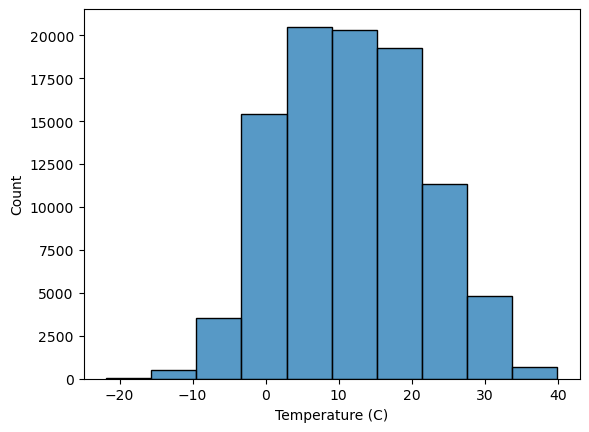

In [27]:
def histogram():
    sns.histplot(x=df['Temperature (C)'],data=df,bins=10)
    plt.savefig('hist.png')
    return
histogram()

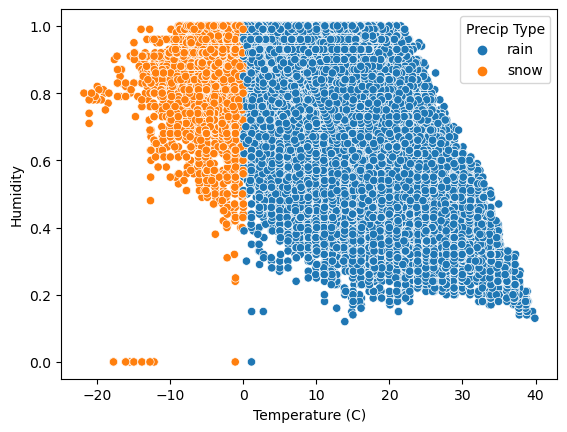

In [28]:
def scatter():
    sns.scatterplot(x='Temperature (C)',y='Humidity',data=df,hue='Precip Type')
    plt.savefig('scatter.png')
scatter()

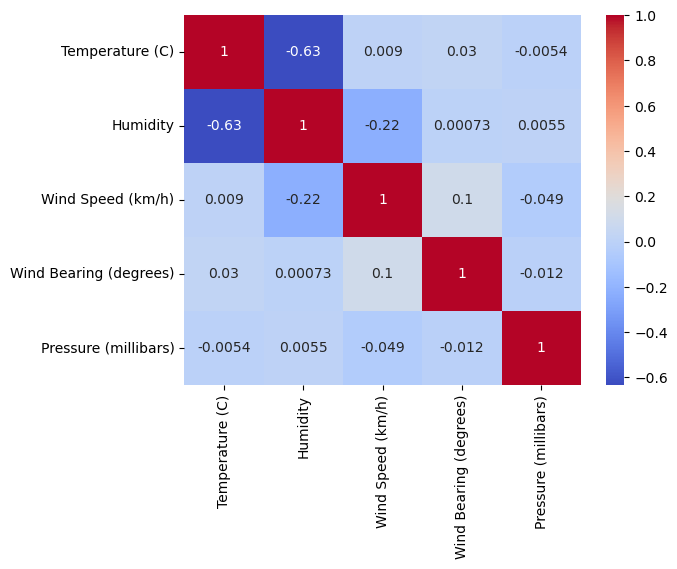

In [29]:
def heatmap():
    sns.heatmap(df[['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']].corr(),cmap='coolwarm',annot=True)
    plt.savefig('heatmap.png')
heatmap()    
    

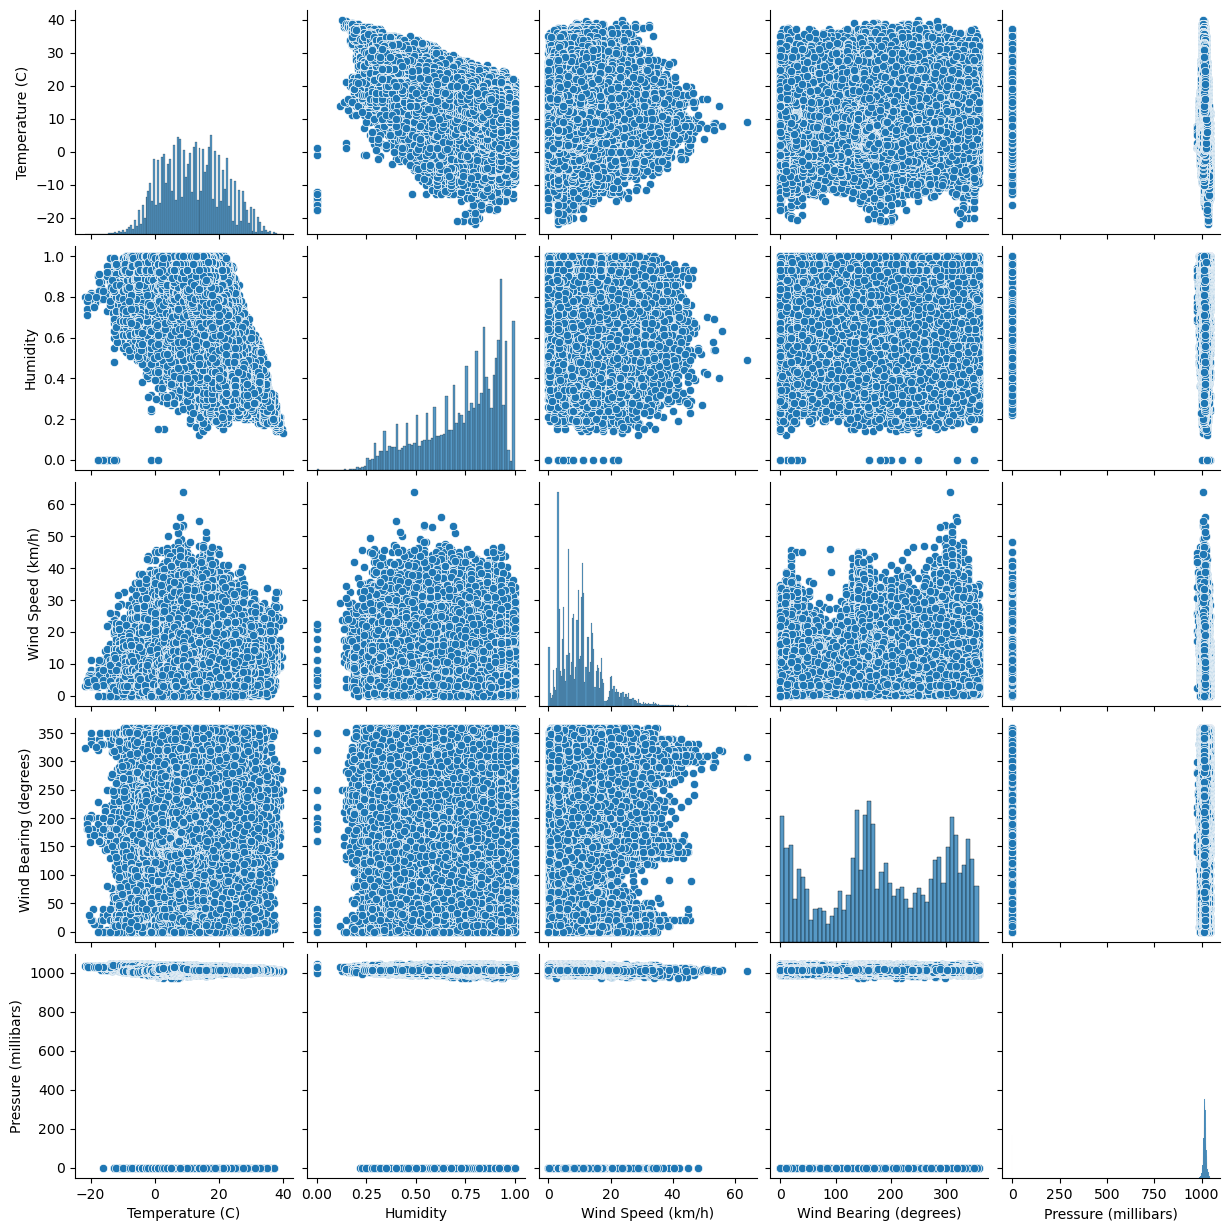

In [30]:
def pairplot():
    sns.pairplot(df)
pairplot()    

In [31]:
# fitting plots

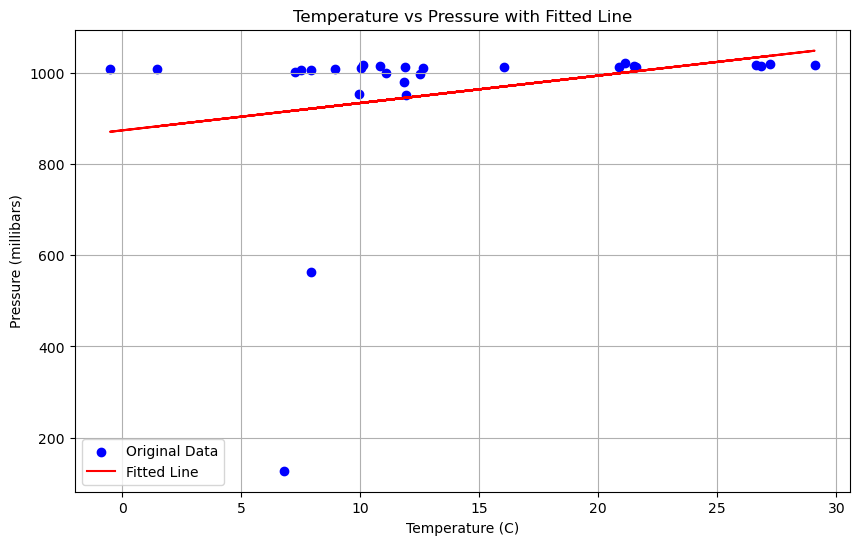

In [32]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_temperature_pressure(groupdf):
    # Extract temperature and pressure data
    temperature = groupdf['Temperature (C)']
    pressure = groupdf['Pressure (millibars)']

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(temperature, pressure)

    # Generate fitted line
    fit_line = slope * temperature + intercept

    # Plot original data and fitted line
    plt.figure(figsize=(10, 6))
    plt.scatter(temperature, pressure, label='Original Data', color='blue')
    plt.plot(temperature, fit_line, color='red', label='Fitted Line')

    # Add labels and legend
    plt.xlabel('Temperature (C)')
    plt.ylabel('Pressure (millibars)')
    plt.title('Temperature vs Pressure with Fitted Line')
    plt.savefig('tempre.png')
    plt.legend()
    # Show plot
    plt.grid(True)
    plt.show()


plot_temperature_pressure(groupdf)


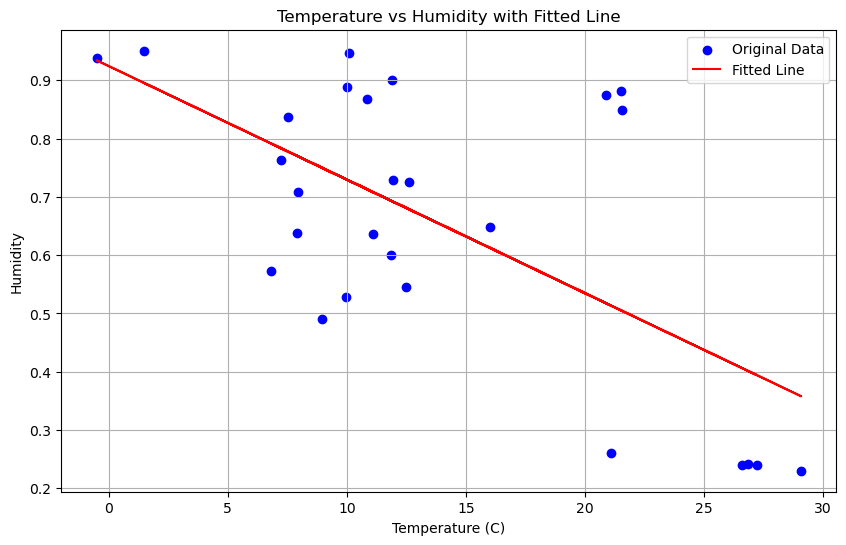

In [33]:
def plot_temperature_humidity(groupdf):
    # Extract temperature and humidity data
    temperature = groupdf['Temperature (C)']
    humidity = groupdf['Humidity']

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(temperature, humidity)

    # Generate fitted line
    fit_line = slope * temperature + intercept

    # Plot original data and fitted line
    plt.figure(figsize=(10, 6))
    plt.scatter(temperature, humidity, label='Original Data', color='blue')
    plt.plot(temperature, fit_line, color='red', label='Fitted Line')

    # Add labels and legend
    plt.xlabel('Temperature (C)')
    plt.ylabel('Humidity')
    plt.title('Temperature vs Humidity with Fitted Line')
    plt.savefig('temphumi.png')
    plt.legend()

    # Show plot
    plt.grid()
    plt.show()


plot_temperature_humidity(groupdf)

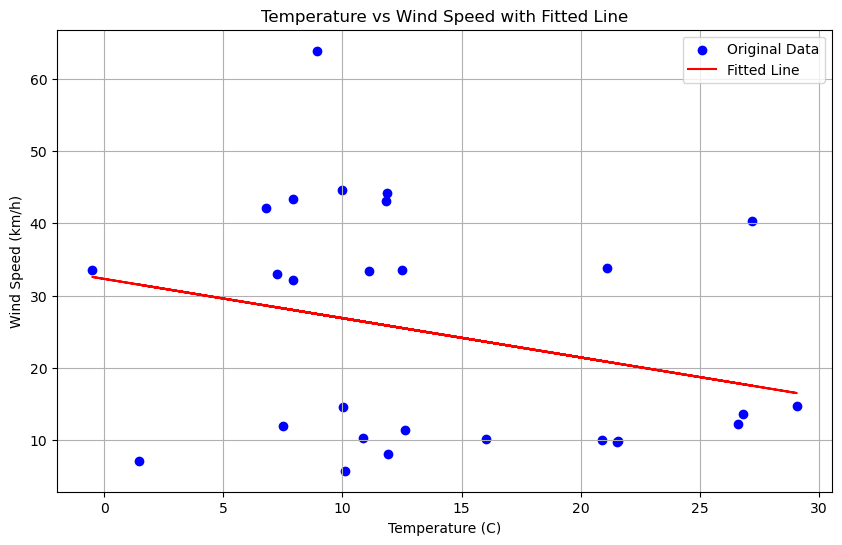

In [34]:
def plot_temperature_wind_speed(groupdf):
    # Extract temperature and wind speed data
    temperature = groupdf['Temperature (C)']
    wind_speed = groupdf['Wind Speed (km/h)']

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(temperature, wind_speed)

    # Generate fitted line
    fit_line = slope * temperature + intercept

    # Plot original data and fitted line
    plt.figure(figsize=(10, 6))
    plt.scatter(temperature, wind_speed, label='Original Data', color='blue')
    plt.plot(temperature, fit_line, color='red', label='Fitted Line')

    # Add labels and legend
    plt.xlabel('Temperature (C)')
    plt.ylabel('Wind Speed (km/h)')
    plt.title('Temperature vs Wind Speed with Fitted Line')
    plt.savefig('tempspeed.png')
    plt.legend()

    # Show plot
    plt.grid()
    plt.show()


plot_temperature_wind_speed(groupdf)

In [35]:
# exponential

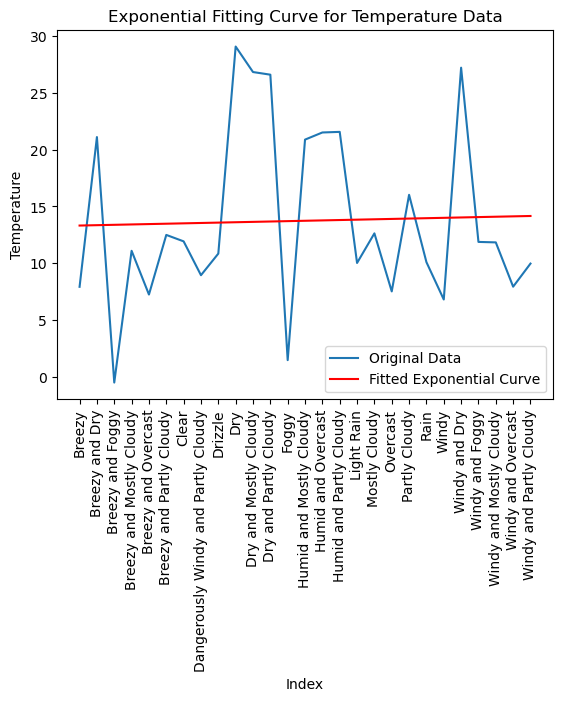

In [36]:
def plot_exponential_fit(groupdf):
    # Extract temperature data
    temperature = groupdf['Temperature (C)']

    # Define the exponential function
    def exponential_func(x, a, b, c):
        return a * np.exp(b * x) + c

    # Provide an initial guess for the parameters
    initial_guess = (1, 0, 0)

    # Fit the exponential curve with the initial guess
    popt, pcov = curve_fit(exponential_func, range(len(temperature)), temperature, p0=initial_guess)

    # Plot the original data
    plt.plot(temperature, label='Original Data')

    # Plot the fitted curve
    plt.plot(exponential_func(range(len(temperature)), *popt), 'r-', label='Fitted Exponential Curve')

    plt.xlabel('Index')
    plt.ylabel('Temperature')
    plt.xticks(rotation=90)
    plt.title('Exponential Fitting Curve for Temperature Data')
    plt.savefig('tempexp.png')
    plt.legend()
    plt.show()


plot_exponential_fit(groupdf)

In [37]:
#elbow and sillhoute 

In [38]:
X = groupdf[['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']]

In [39]:
#Silhouette Score:
#Define Function to Determine the Optimal Number of Clusters using the Silhouette Score
def determine_num_clusters_silhouette(groupdf):
    silhouette_scores = []
    for num_clusters in range(2, 11):
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(groupdf)
        silhouette_scores.append(silhouette_score(groupdf, cluster_labels))
    
    # Plotting the Silhouette Scores
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.savefig('sillhoute.png')
    plt.show()

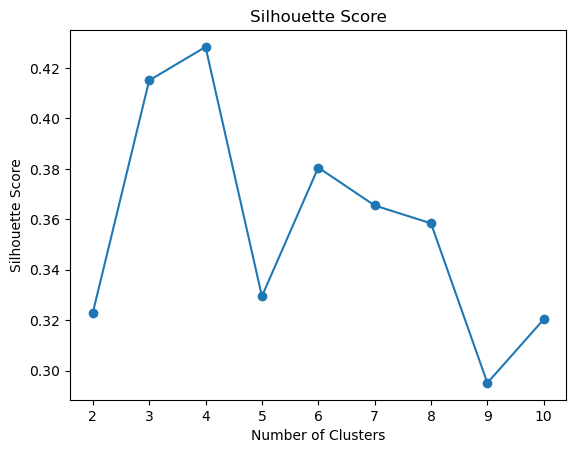

In [40]:
from sklearn.preprocessing import StandardScaler
#Normalize and Scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Number of Clusters using the Silhouette Score
determine_num_clusters_silhouette(scaled_data)

In [41]:
# clustering

In [42]:
# Clustering Function
def clustering_function(df, num_clusters):

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(groupdf)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    data_with_clusters = groupdf.copy()
    data_with_clusters['Cluster'] = clusters
    return data_with_clusters

# Select Relevant Features for Clustering
X = groupdf[['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']]

# Perform KMeans Clustering with Optimal Number of Clusters
num_clusters = 5 
clustered_data = clustering_function(X, num_clusters)

# Printing the Clustered Data
print("Clustered Data:\n", clustered_data.head())

Clustered Data:
                           Temperature (C)  Humidity  Wind Speed (km/h)  \
Summary                                                                  
Breezy                           7.922016  0.637778          32.143948   
Breezy and Dry                  21.111111  0.260000          33.810000   
Breezy and Foggy                -0.510317  0.938571          33.477880   
Breezy and Mostly Cloudy        11.093411  0.637054          33.386345   
Breezy and Overcast              7.241614  0.763144          33.037566   

                          Wind Bearing (degrees)  Pressure (millibars)  \
Summary                                                                  
Breezy                                233.018519            563.917593   
Breezy and Dry                        240.000000           1021.600000   
Breezy and Foggy                      160.628571           1008.934000   
Breezy and Mostly Cloudy              227.639535           1000.622984   
Breezy and Overcast 

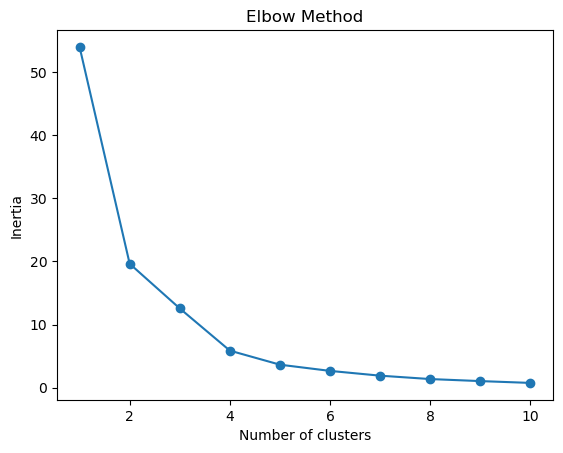

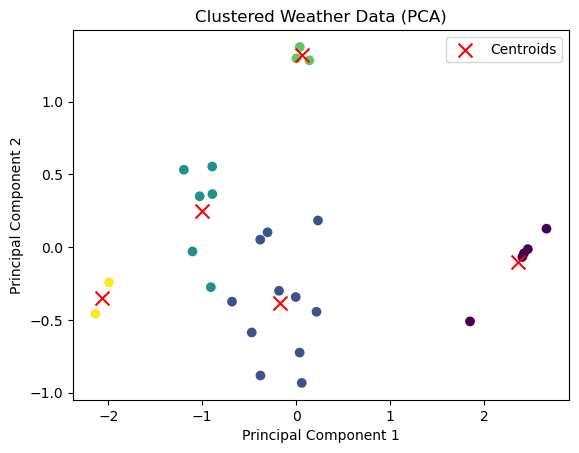

In [43]:
def cluster_weather_data(groupdf):
    from sklearn.decomposition import PCA
    
    # Select relevant features for clustering
    # Example: Temperature (C) and Humidity
    X = groupdf[['Temperature (C)', 'Humidity']].values

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform PCA to reduce dimensionality
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Calculate inertia for different numbers of clusters
    inertia = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
        kmeans.fit(X_pca)
        inertia.append(kmeans.inertia_)

    # Plotting the elbow curve
    plt.plot(range(1, 11), inertia, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.savefig('elbow1.png')
    plt.show()

    # Based on the elbow curve, choose the optimal number of clusters
    # Let's say the optimal number of clusters is 3
    optimal_n_clusters = 5

    # Perform K-means clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_n_clusters, n_init=15, random_state=1)
    kmeans.fit(X_pca)

    # Assign clusters to each data point
    clusters = kmeans.predict(X_pca)

    # Visualize the clusters
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Centroids')
    plt.title('Clustered Weather Data (PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.savefig('clust1.png')
    plt.legend()
    plt.show()


cluster_weather_data(groupdf)

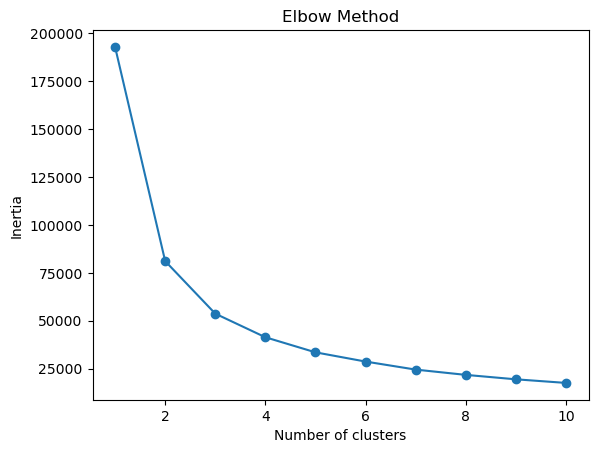

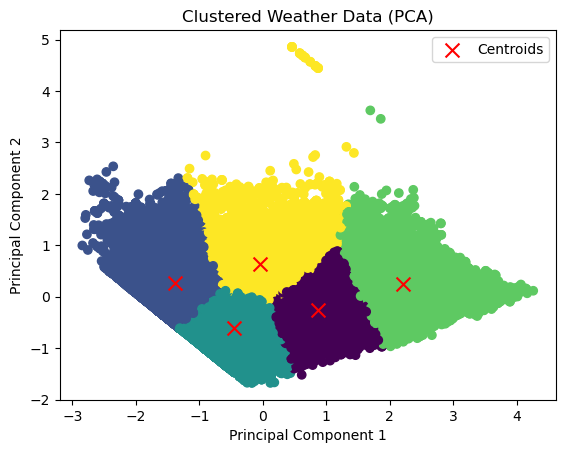

In [44]:
def cluster_weather_data(df):
    # Select relevant features for clustering
    # Example: Temperature (C) and Humidity
    X = df[['Temperature (C)', 'Humidity']].values

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform PCA to reduce dimensionality
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Calculate inertia for different numbers of clusters
    inertia = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
        kmeans.fit(X_pca)
        inertia.append(kmeans.inertia_)

    # Plotting the elbow curve
    plt.plot(range(1, 11), inertia, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.savefig('elbow2.png')
    plt.show()

    # Based on the elbow curve, choose the optimal number of clusters
    optimal_n_clusters = 5

    # Perform K-means clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_n_clusters, n_init=10, random_state=0)
    kmeans.fit(X_pca)

    # Assign clusters to each data point
    clusters = kmeans.predict(X_pca)

    # Visualize the clusters
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Centroids')
    plt.title('Clustered Weather Data (PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.savefig('clust2.png')
    plt.legend()
    plt.show()

cluster_weather_data(df)